In [2]:
import pandas as pd
import numpy as np

df=pd.read_excel('state_M2024_dl.xlsx')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37609 entries, 0 to 37608
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          37609 non-null  int64  
 1   AREA_TITLE    37609 non-null  object 
 2   AREA_TYPE     37609 non-null  int64  
 3   PRIM_STATE    37609 non-null  object 
 4   NAICS         37609 non-null  int64  
 5   NAICS_TITLE   37609 non-null  object 
 6   I_GROUP       37609 non-null  object 
 7   OWN_CODE      37609 non-null  int64  
 8   OCC_CODE      37609 non-null  object 
 9   OCC_TITLE     37609 non-null  object 
 10  O_GROUP       37609 non-null  object 
 11  TOT_EMP       37609 non-null  object 
 12  EMP_PRSE      37609 non-null  object 
 13  JOBS_1000     37609 non-null  object 
 14  LOC_QUOTIENT  37609 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        37609 non-null  object 
 18  A_MEAN        37609 non-nu

In [4]:
df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,2091480,0,1000,1,NaN,NaN,26.61,55350,0.3,11.31,14.74,21.07,30.82,47.51,23520,30660,43830,64110,98810,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,110240,0.9,52.708,0.74,NaN,NaN,57.05,118670,0.7,24.57,35.03,48.39,68.5,98.03,51100,72870,100640,142480,203900,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,830,17.6,0.396,0.29,NaN,NaN,99.61,207190,4.6,50.46,62.96,79.04,106.69,#,104950,130950,164400,221910,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,32370,1.6,15.476,0.67,NaN,NaN,64.8,134790,1.6,24.24,35.92,51.12,78.26,#,50410,74720,106330,162780,#,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,1120,8.7,0.533,3.1,NaN,NaN,*,36570,3.8,*,*,*,*,*,18270,20950,26990,41760,63900,True,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37609 entries, 0 to 37608
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          37609 non-null  int64  
 1   AREA_TITLE    37609 non-null  object 
 2   AREA_TYPE     37609 non-null  int64  
 3   PRIM_STATE    37609 non-null  object 
 4   NAICS         37609 non-null  int64  
 5   NAICS_TITLE   37609 non-null  object 
 6   I_GROUP       37609 non-null  object 
 7   OWN_CODE      37609 non-null  int64  
 8   OCC_CODE      37609 non-null  object 
 9   OCC_TITLE     37609 non-null  object 
 10  O_GROUP       37609 non-null  object 
 11  TOT_EMP       37609 non-null  object 
 12  EMP_PRSE      37609 non-null  object 
 13  JOBS_1000     37609 non-null  object 
 14  LOC_QUOTIENT  37609 non-null  object 
 15  PCT_TOTAL     0 non-null      float64
 16  PCT_RPT       0 non-null      float64
 17  H_MEAN        37609 non-null  object 
 18  A_MEAN        37609 non-nu

In [6]:
df.describe()


,AREA,AREA_TYPE,NAICS,OWN_CODE,PCT_TOTAL,PCT_RPT
count,37609.000000,37609.000000,37609.0,37609.0,0.0,0.0
mean,30.176633,2.026829,0.0,1235.0,NaN,NaN
std,16.823968,0.161585,0.0,0.0,NaN,NaN
min,1.000000,2.000000,0.0,1235.0,NaN,NaN
25%,17.000000,2.000000,0.0,1235.0,NaN,NaN
50%,30.000000,2.000000,0.0,1235.0,NaN,NaN
75%,44.000000,2.000000,0.0,1235.0,NaN,NaN
max,78.000000,3.000000,0.0,1235.0,NaN,NaN


In [7]:
#Dropping columns that are just missing values in them since they are of no use to us
missing_calue_cols=[
    'PCT_TOTAL','PCT_RPT','ANNUAL','HOURLY'
]
df=df.drop(columns=missing_calue_cols)


In [8]:
df_filtered = df[['OCC_TITLE', 'TOT_EMP', 'A_MEAN', 'PRIM_STATE', 'O_GROUP']]
df_filtered.head()


,OCC_TITLE,TOT_EMP,A_MEAN,PRIM_STATE,O_GROUP
0,All Occupations,2091480,55350,AL,total
1,Management Occupations,110240,118670,AL,major
2,Chief Executives,830,207190,AL,detailed
3,General and Operations Managers,32370,134790,AL,detailed
4,Legislators,1120,36570,AL,detailed


C:\Users\Anirudh Nagaraj\AppData\Local\Temp\ipykernel_58528\1908950500.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


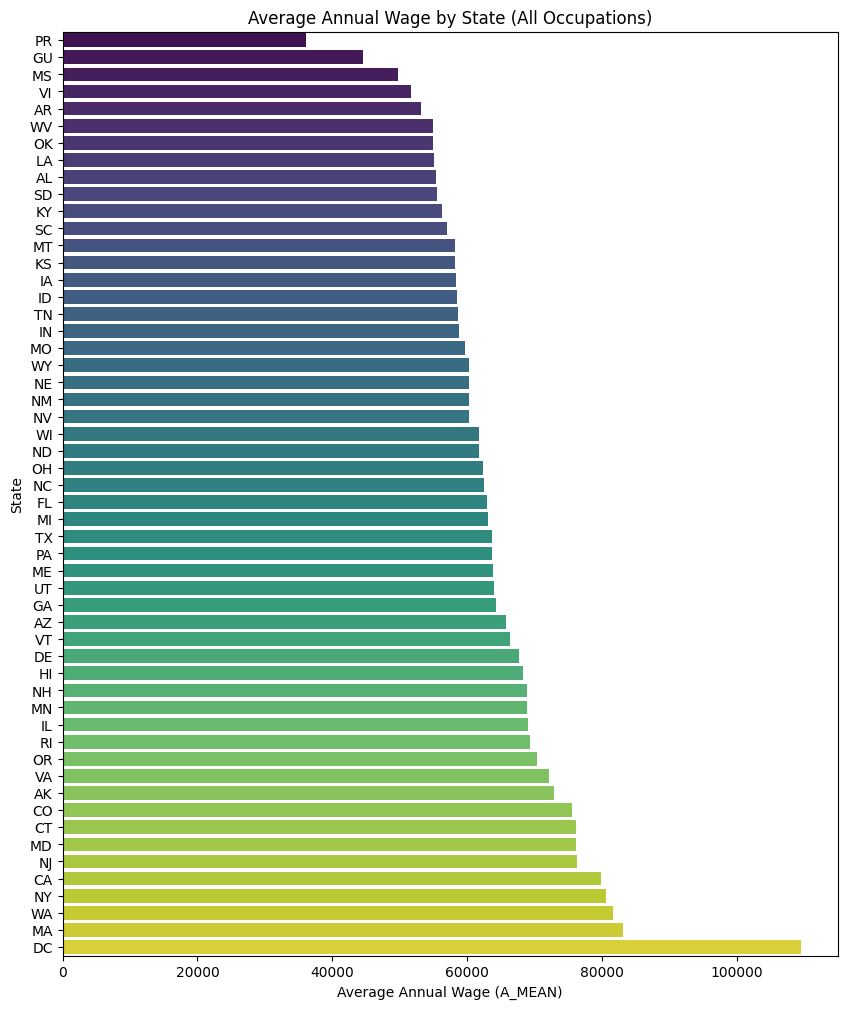

In [9]:
df_total = df[df['O_GROUP'] == 'total']
df_total = df[(df['O_GROUP'] == 'total') & (df['OCC_TITLE'] == 'All Occupations')]
state_wages = df_total.groupby('PRIM_STATE')['A_MEAN'].mean().sort_values()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))
sns.barplot(
    data=state_wages.reset_index(),
    x='A_MEAN',
    y='PRIM_STATE',
    palette='viridis'
)

plt.title('Average Annual Wage by State (All Occupations)')
plt.xlabel('Average Annual Wage (A_MEAN)')
plt.ylabel('State')
plt.show()


District of Columbia stands out as the highest-paying region in the dataset, with average wages significantly above every U.S. state.
This wage premium reflects D.C.’s concentration of federal agencies, policy institutions, and high-skill professional occupations such as legal services, public administration, and consulting.

On the opposite end, Puerto Rico reports the lowest average annual wages—less than half of D.C.’s level.
This gap highlights substantial structural differences in cost of living, industry composition, and economic conditions across U.S. jurisdictions.

C:\Users\Anirudh Nagaraj\AppData\Local\Temp\ipykernel_58528\4150966613.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


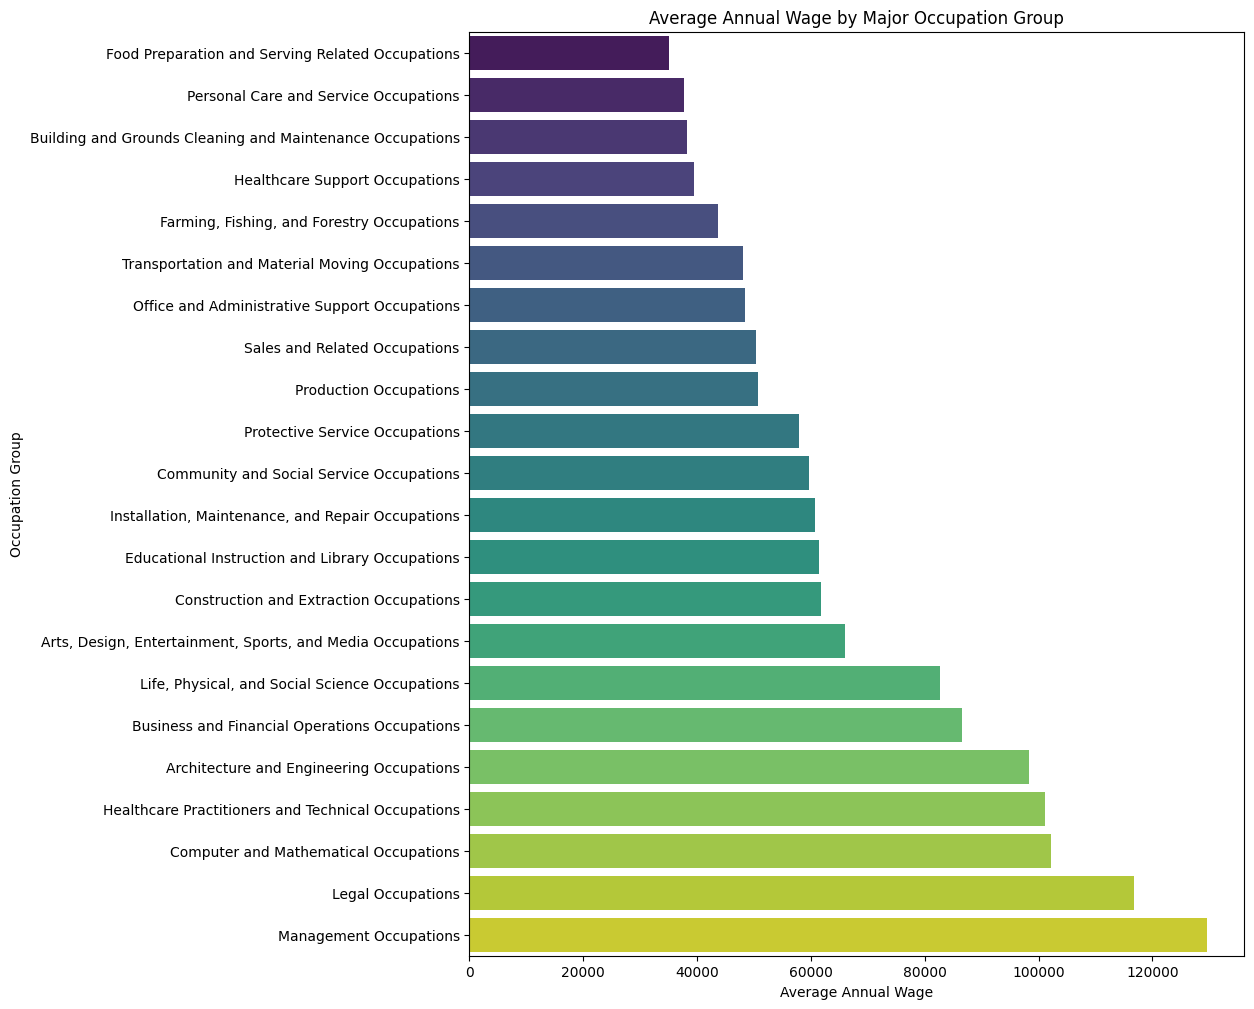

In [10]:
# Columns that must be numeric
numeric_cols = ['TOT_EMP', 'A_MEAN']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_major = df[df['O_GROUP'] == 'major']
major_wages = (
    df_major.groupby('OCC_TITLE')['A_MEAN']
    .mean()
    .sort_values()
)
plt.figure(figsize=(10, 12))
sns.barplot(
    data=major_wages.reset_index(),
    x='A_MEAN', y='OCC_TITLE', palette='viridis'
)
plt.title('Average Annual Wage by Major Occupation Group')
plt.xlabel('Average Annual Wage')
plt.ylabel('Occupation Group')
plt.show()


The analysis reveals clear wage stratification across the major occupational groups defined by the U.S. Department of Labor.

Key Findings

Management Occupations represent the highest-paying group, reflecting the premium placed on leadership responsibility, experience, and decision-making authority.

Legal and Computer & Mathematical Occupations follow closely, driven by specialized skills, advanced education requirements, and strong market demand.

Healthcare Practitioners, Architecture & Engineering, and Business & Financial Operations also exhibit above-average wage levels due to technical expertise and professional licensure.

Mid-wage groups include Education, Repair & Installation, and Community & Social Services, where compensation varies based on role complexity and credential requirements.

The lowest-paying groups—including Food Preparation, Personal Care, Building & Grounds Maintenance, and Healthcare Support—tend to consist of service-based occupations with lower barriers to entry and higher labor supply.

Summary

Wages rise significantly with occupation groups that require advanced training, professional accreditation, or specialized expertise. Service-oriented roles with lower entry barriers show the lowest average wages across the labor market.

C:\Users\Anirudh Nagaraj\AppData\Local\Temp\ipykernel_58528\670269426.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anirudh Nagaraj\AppData\Local\Temp\ipykernel_58528\670269426.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


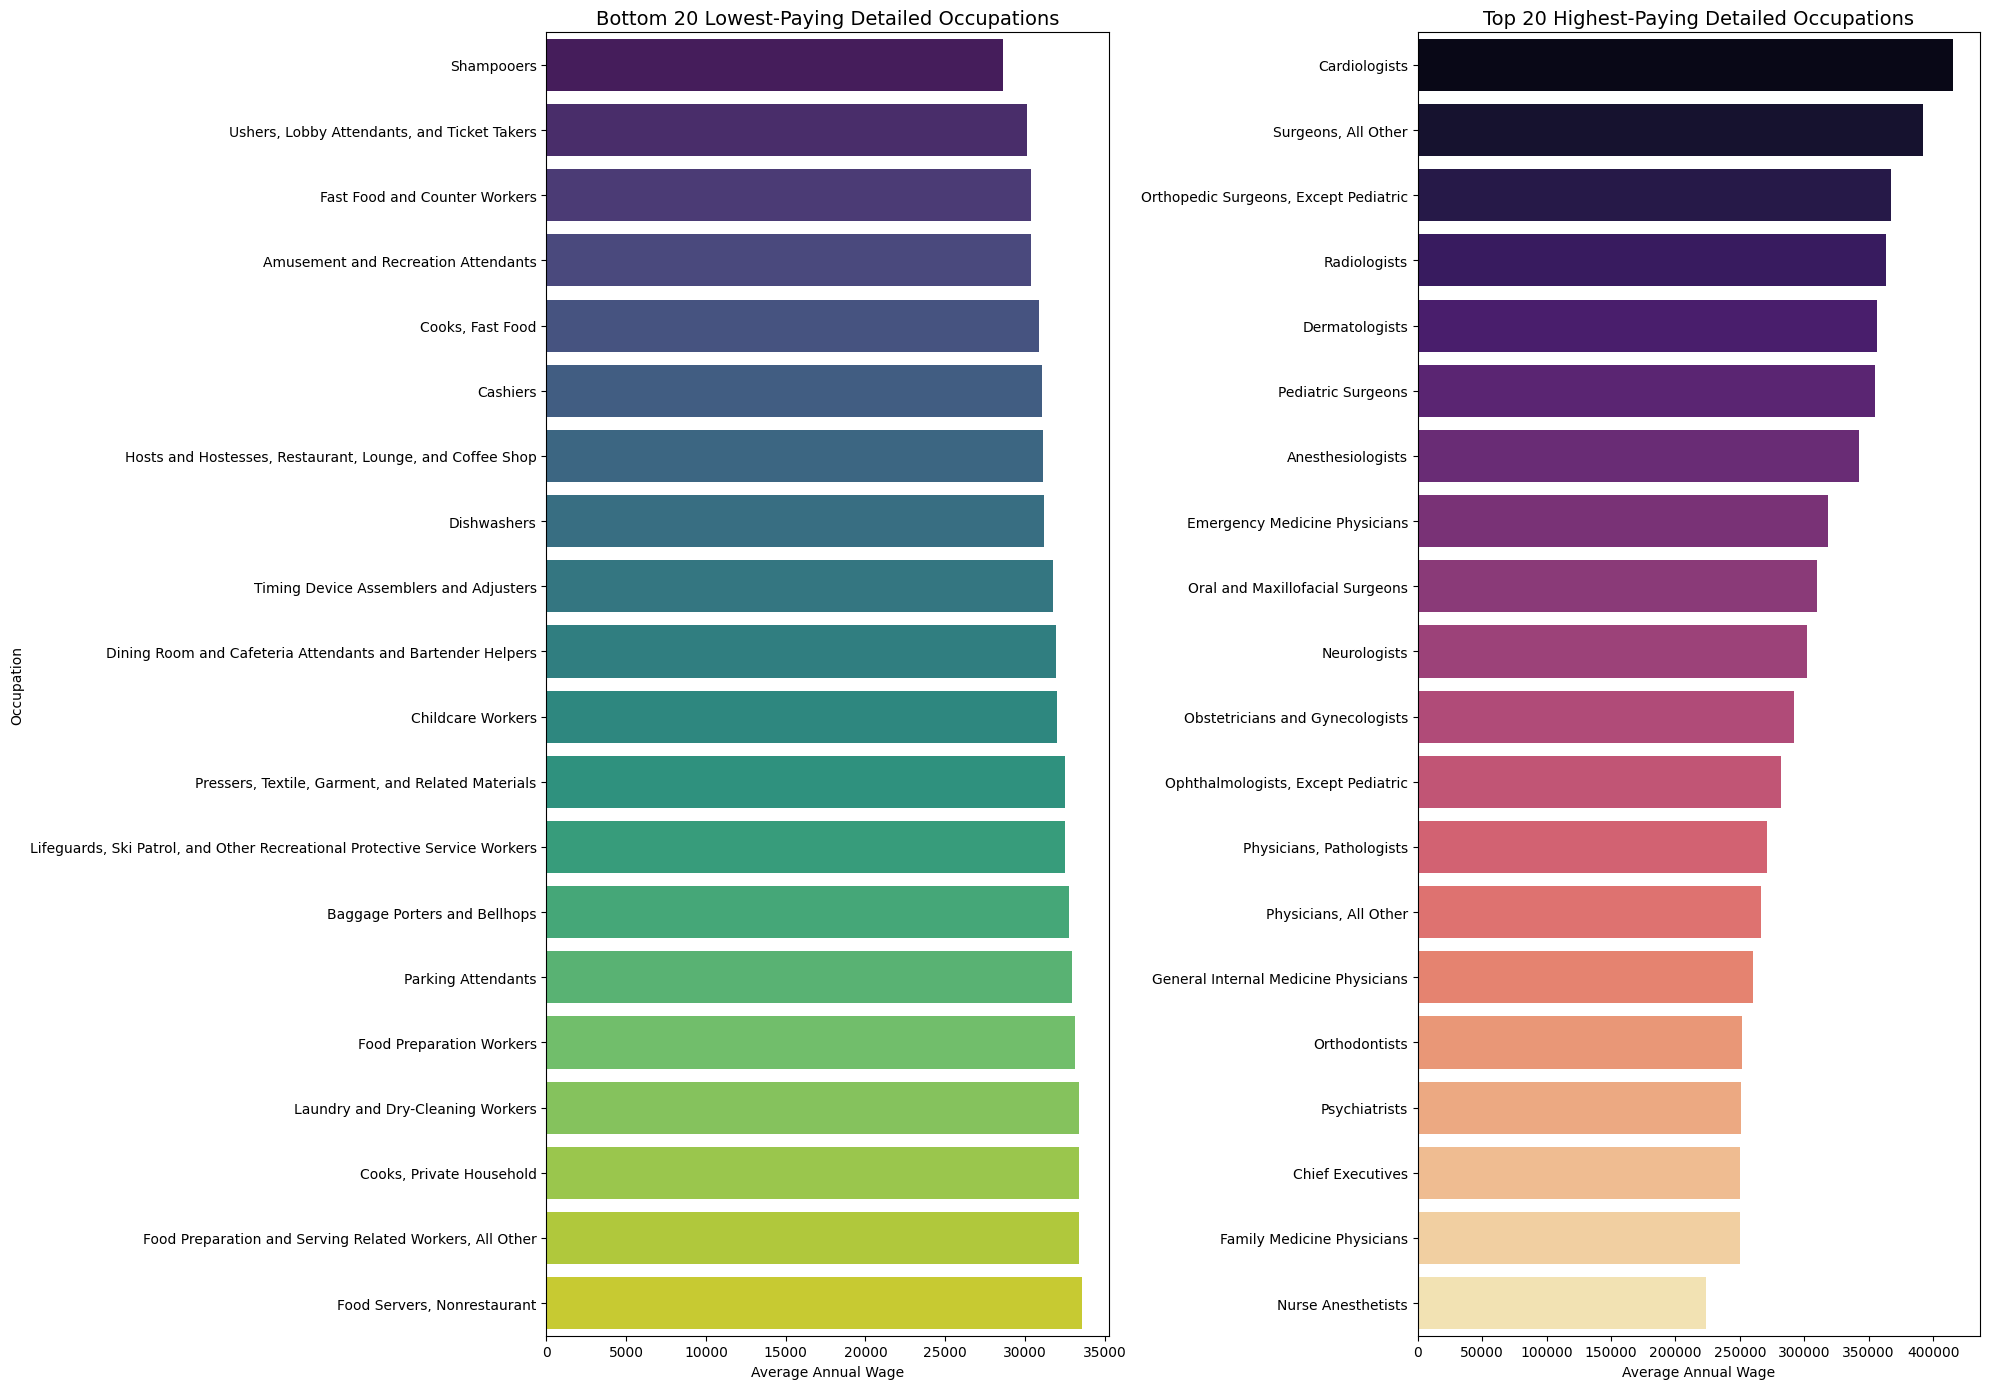

In [11]:
# Filter detailed occupations
df_detailed = df[df['O_GROUP'] == 'detailed'].copy()

# Convert A_MEAN to numeric
df_detailed['A_MEAN'] = pd.to_numeric(df_detailed['A_MEAN'], errors='coerce')

# Group to get mean wages per detailed occupation
detailed_wages = (
    df_detailed.groupby('OCC_TITLE')['A_MEAN']
    .mean()
    .dropna()
)

# Top 20 highest and bottom 20 lowest
top20 = detailed_wages.sort_values(ascending=False).head(20)
bottom20 = detailed_wages.sort_values().head(20)

# --- Plot side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(20, 14))

# Left = Bottom 20
sns.barplot(
    data=bottom20.reset_index(),
    x='A_MEAN', y='OCC_TITLE', palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Bottom 20 Lowest-Paying Detailed Occupations', fontsize=14)
axes[0].set_xlabel('Average Annual Wage')
axes[0].set_ylabel('Occupation')

# Right = Top 20
sns.barplot(
    data=top20.reset_index(),
    x='A_MEAN', y='OCC_TITLE', palette='magma',
    ax=axes[1]
)
axes[1].set_title('Top 20 Highest-Paying Detailed Occupations', fontsize=14)
axes[1].set_xlabel('Average Annual Wage')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()



Key Observations

Highest-Paying Occupations

The top-paying roles are overwhelmingly concentrated in:

Medical Specialties (Cardiologists, Surgeons, Orthopedic Surgeons, Radiologists, Dermatologists)

Advanced Clinical Roles (Anesthesiologists, Emergency Medicine Physicians, OB/GYNs)

Specialized Practitioners (Pathologists, Pediatric Surgeons, Neurologists)

Executive Leadership (Chief Executives)

These occupations share characteristics such as:

extensive education and training

licensing and board certification

limited labor supply

high barriers to entry

As a result, wages frequently exceed $300k–$400k+ annually.

Lowest-Paying Occupations

The lowest-paying jobs cluster in:

Food Service (Fast food workers, cooks, dishwashers, nonrestaurant food servers)

Hospitality (Hosts/hostesses, amusement attendants)

Personal Services (Shampooers, childcare workers)

Low-skill manual labor (Laundry workers, parking attendants)

These roles tend to:

require minimal training or credentials

have high labor supply

be concentrated in low-margin industries

exhibit limited wage growth

Annual wages for these occupations typically fall in the $22k–$30k range.

Summary

The contrast between the top and bottom of the wage distribution illustrates a structural divide in the U.S. labor market. High-skill, high-barrier medical and executive roles dominate the top tier, while service-sector and manual labor jobs anchor the bottom.

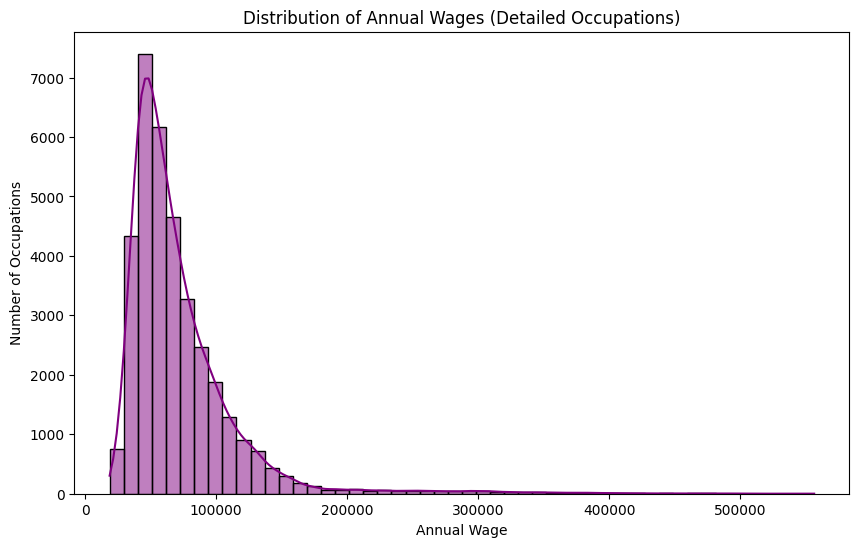

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df_detailed['A_MEAN'], bins=50, kde=True, color='purple')
plt.title('Distribution of Annual Wages (Detailed Occupations)')
plt.xlabel('Annual Wage')
plt.ylabel('Number of Occupations')
plt.show()


Wage data is not normally distributed. Instead, it follows a heavy-tailed distribution where most occupations earn moderate wages, and a small set of professions earn exceptionally high salaries. This has implications for regression modeling and variance analysis, as transformations (e.g., log-wage) may be appropriate in later stages.

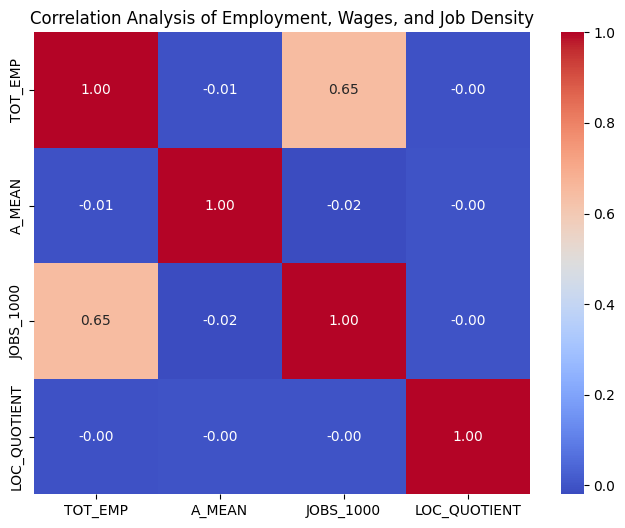

In [13]:
numeric_cols = ['TOT_EMP', 'A_MEAN', 'JOBS_1000', 'LOC_QUOTIENT']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr_matrix = df[numeric_cols].corr()
corr_matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Analysis of Employment, Wages, and Job Density')
plt.show()


Overall, the correlation analysis shows that wages are largely independent of employment volume, job density, and regional specialization. High-wage occupations tend to be specialized and employ fewer workers, while low-wage occupations dominate the workforce.

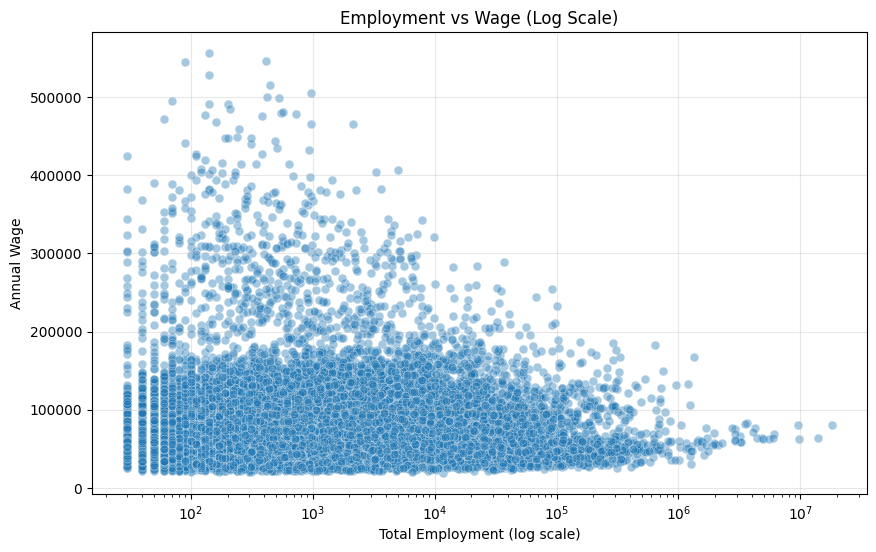

In [14]:
# Convert to numeric if not already done
df['TOT_EMP'] = pd.to_numeric(df['TOT_EMP'], errors='coerce')
df['A_MEAN'] = pd.to_numeric(df['A_MEAN'], errors='coerce')


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='TOT_EMP',
    y='A_MEAN',
    alpha=0.4,
    s=40
)

plt.xscale('log')
plt.title('Employment vs Wage (Log Scale)')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Annual Wage')
plt.grid(alpha=0.3)
plt.show()



High-wage occupations are rare and highly specialized, while low-wage occupations employ very large numbers of workers. The log-scaled scatterplot clearly demonstrates that employment size has no meaningful relationship with wage levels.

In [15]:


plt.figure(figsize=(10, 12))
sns.barplot(
    data=df_major_wages.reset_index(),
    x='A_MEAN',
    y='OCC_TITLE',
    palette='viridis'
)
plt.title('Average Annual Wage by Major Occupation Group', fontsize=16)
plt.xlabel('Average Annual Wage')
plt.ylabel('Major Occupation Group')
plt.tight_layout()
plt.show()


NameError: name 'df_major_wages' is not defined

<Figure size 1000x1200 with 0 Axes>

C:\Users\Anirudh Nagaraj\AppData\Local\Temp\ipykernel_24604\2828734228.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


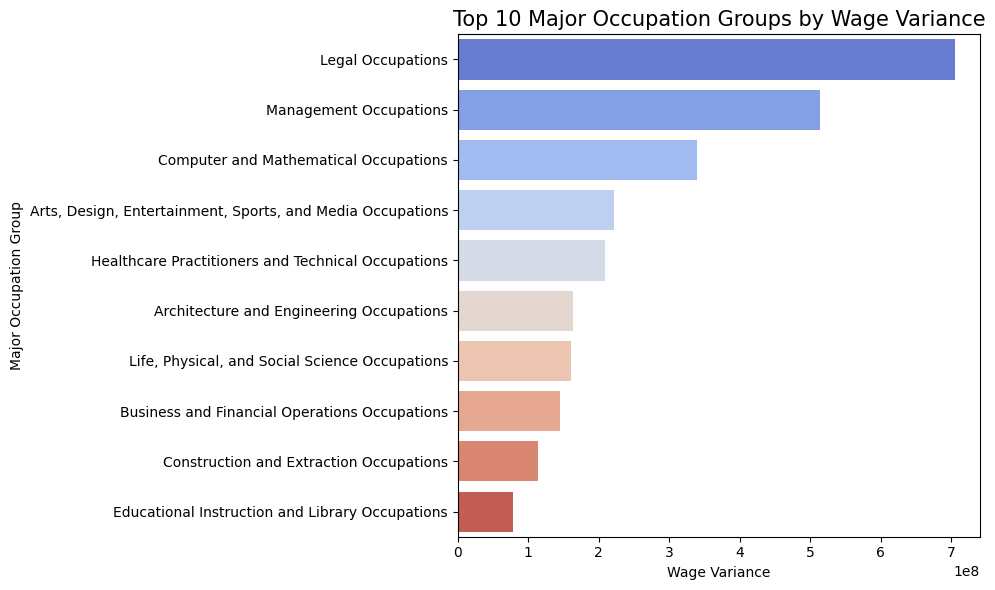

C:\Users\Anirudh Nagaraj\AppData\Local\Temp\ipykernel_24604\2828734228.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


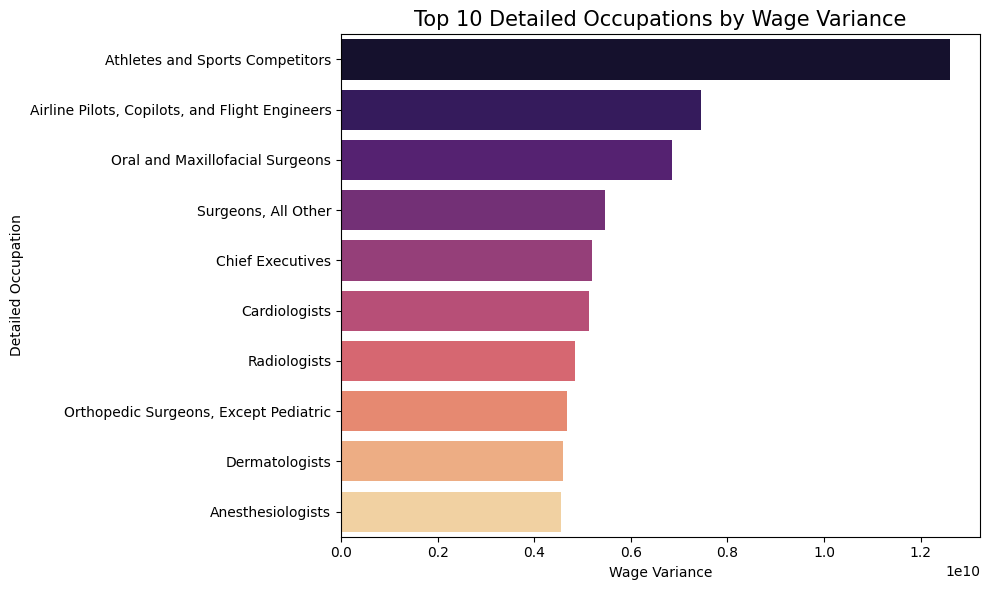

In [ ]:
var_major = (
    df_major.groupby('OCC_TITLE')['A_MEAN']
    .var()
    .sort_values(ascending=False)
)

var_detail = (
    df_detail.groupby('OCC_TITLE')['A_MEAN']
    .var()
    .sort_values(ascending=False)
)

top10_major_var = var_major.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_major_var.reset_index(),
    x='A_MEAN',
    y='OCC_TITLE',
    palette='coolwarm'
)
plt.title('Top 10 Major Occupation Groups by Wage Variance', fontsize=15)
plt.xlabel('Wage Variance')
plt.ylabel('Major Occupation Group')
plt.tight_layout()
plt.show()

top10_detail_var = var_detail.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_detail_var.reset_index(),
    x='A_MEAN',
    y='OCC_TITLE',
    palette='magma'
)
plt.title('Top 10 Detailed Occupations by Wage Variance', fontsize=15)
plt.xlabel('Wage Variance')
plt.ylabel('Detailed Occupation')
plt.tight_layout()
plt.show()


Wage variance is strongly tied to occupational heterogeneity.
Fields with diverse job types, broad skill ranges, or performance-based compensation exhibit the largest wage dispersion. Conversely, occupations with standardized training pathways, regulated pay, or uniform job duties display lower variance.

This analysis helps identify areas of high income inequality, occupational instability, and roles where wage outcomes are heavily influenced by external factors such as geography, employer type, or industry structure.

In [17]:
import statsmodels.api as sm
df['A_MEAN'] = pd.to_numeric(df['A_MEAN'], errors='coerce')
df['TOT_EMP'] = pd.to_numeric(df['TOT_EMP'], errors='coerce')

reg=df[['TOT_EMP','A_MEAN']].dropna()
X=reg['TOT_EMP']
y=reg['A_MEAN']
X=sm.add_constant(reg['TOT_EMP'])
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 A_MEAN   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.553
Date:                Wed, 19 Nov 2025   Prob (F-statistic):              0.213
Time:                        23:40:37   Log-Likelihood:            -4.3064e+05
No. Observations:               35660   AIC:                         8.613e+05
Df Residuals:                   35658   BIC:                         8.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.14e+04    225.709    316.343      0.0

In [18]:
from scipy.stats import pearsonr

clean = df[['TOT_EMP', 'A_MEAN']].dropna()

corr, p = pearsonr(clean['TOT_EMP'], clean['A_MEAN'])
print(corr, p)


-0.006599593859775599 0.21268082910683653


In [19]:
df["A_MEDIAN"] = pd.to_numeric(df["A_MEDIAN"], errors="coerce")
df_clean = df.dropna(subset=["A_MEDIAN"])

tech = df_clean[df_clean["OCC_CODE"].astype(str).str.startswith("15")]["A_MEDIAN"]
nontech = df_clean[~df_clean["OCC_CODE"].astype(str).str.startswith("15")]["A_MEDIAN"]

z = (tech.mean() - nontech.mean()) / np.sqrt((tech.std()**2/len(tech)) + (nontech.std()**2/len(nontech)))
print(z)


41.592512316076814


Z ≈ 41.6, which is astronomically large.

p-value is essentially 0.

Tech jobs earn much more than the rest of the labor market.

In [20]:
from scipy.stats import levene

health = df[df['OCC_TITLE'].str.contains("health", case=False, na=False)]['A_MEAN'].dropna()
education = df[df['OCC_TITLE'].str.contains("education", case=False, na=False)]['A_MEAN'].dropna()

w_stat, p_val = levene(health, education, center='median')
print(w_stat, p_val)


120.5411209969138 2.3514038326852067e-27


Levene’s W ≈ 120.5

p-value ≈ 0.000

Wages in healthcare and education do not have equal variance.